# Wavelet:

In [161]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
from sklearn.metrics import mean_squared_error
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
import pywt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [162]:
data=pd.read_csv('day.csv',sep=';',header=None)
data=data.rename(columns={0:'Year',1:'Month',2:'Day',3:'Date',4:'Sunspot',5:'Std',6:'N',7:'isprov'})
data=data.drop(data[data['Sunspot']==-1].index)
data=data.drop(data[data.isprov==0].index)

In [166]:
data.head()

,Year,Month,Day,Date,Sunspot,Std,N,isprov
7,1818,1,8,1818.021,65,10.2,1,1
12,1818,1,13,1818.034,37,7.7,1,1
16,1818,1,17,1818.045,77,11.1,1,1
17,1818,1,18,1818.048,98,12.6,1,1
18,1818,1,19,1818.051,105,13.0,1,1


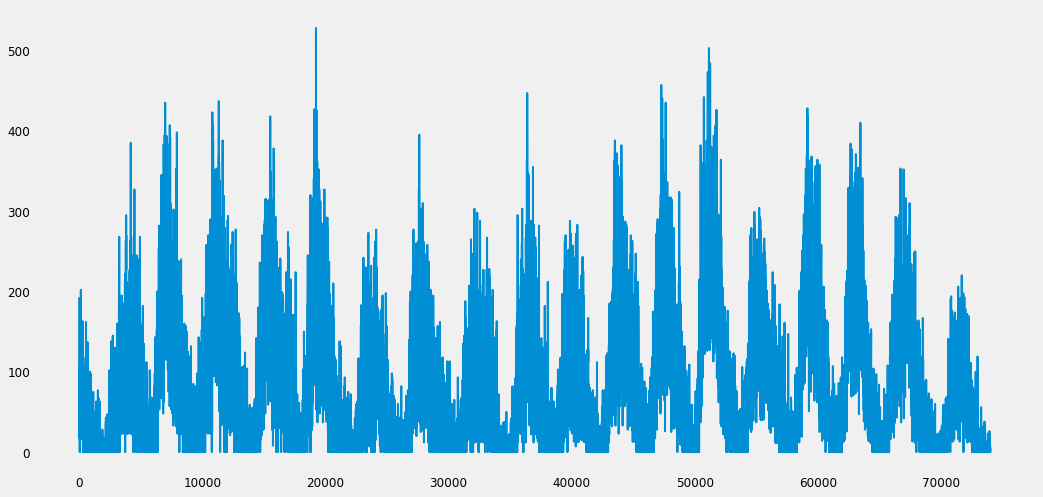

In [167]:

plt.plot(data.Sunspot)

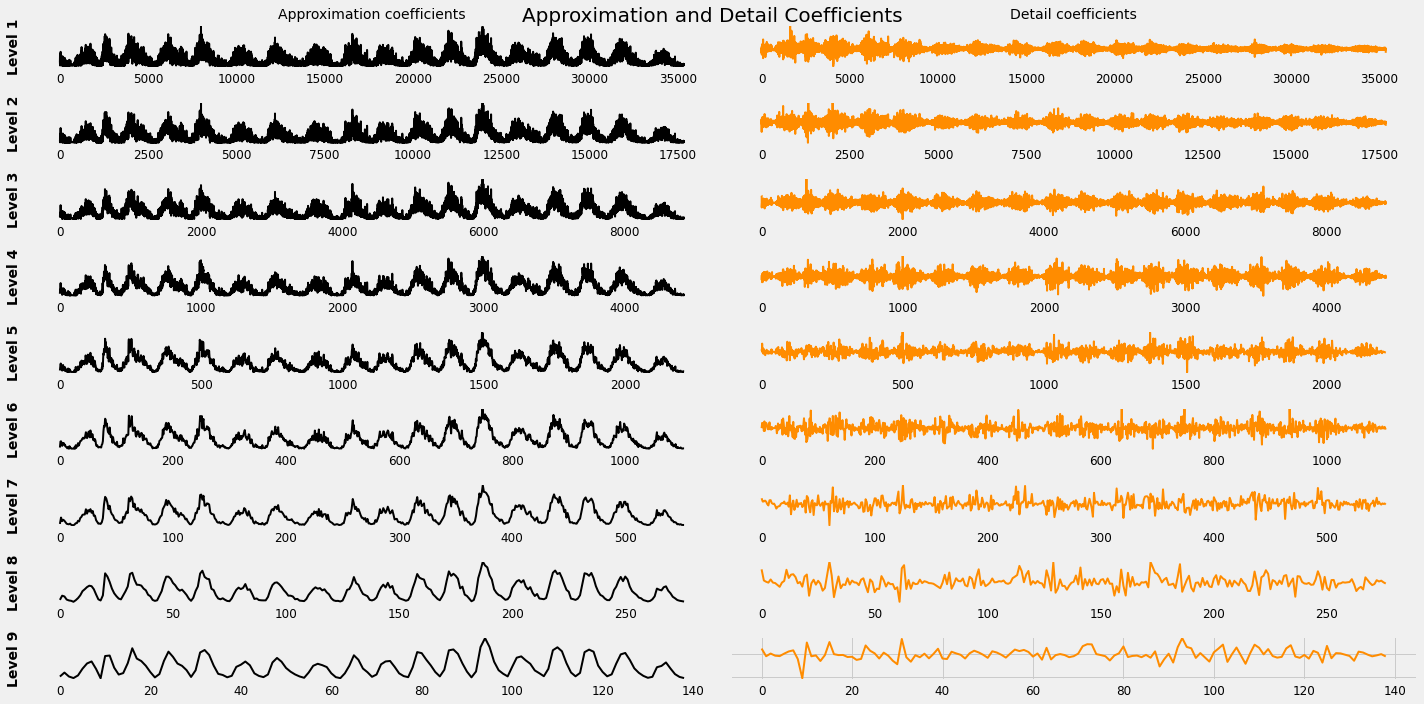

In [168]:
#indices=np.arange(96*10,96*17,1)
#power=2**18
week=data
time=week.Date.max()
sample_rate=1/900.
size= int(sample_rate*time)
t = np.linspace(0, time, num=size)
dataset = np.array(week.Sunspot.tolist())
waveletname = 'sym2'
levels=9
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20,10))
COEFF_D=[]
DATASET=[]
k=1
for ii in range(levels):
    (dataset, coeff_d) = pywt.dwt(dataset, waveletname,mode='per')
    axarr[ii, 0].plot(dataset, 'k')
    axarr[ii, 1].plot(coeff_d, 'darkorange')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    plt.grid(True)
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
    plt.grid(True)
    #print(len(coeff_d))
    COEFF_D.append(np.repeat(coeff_d,2**k))
    DATASET.append(np.repeat(dataset,2**k))
    k=k+1
plt.tight_layout()
plt.suptitle('Approximation and Detail Coefficients',fontsize=20)
plt.show()

In [169]:
error=DATASET[0]-data.Sunspot

In [171]:
corr=np.corrcoef(error,data.Sunspot)[0][1]

In [172]:
print(' The correlation of the dataset with the error is: ' + str(corr*100)+ '%')

 The correlation of the dataset with the error is: 77.18065241651058%


In [173]:
from sklearn.metrics import mean_squared_error as mse

In [174]:
print ('The RMSE is the ' + str(np.sqrt(mse(error,data.Sunspot))/data.Sunspot.max()*100) + '% of the maximum value')

The RMSE is the 13.757128824106903% of the maximum value


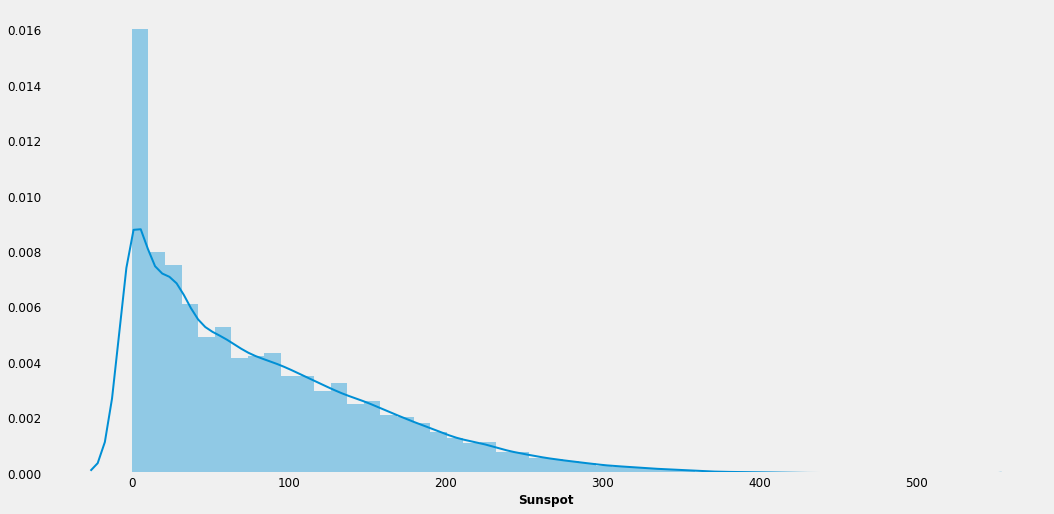

In [175]:
sns.distplot(data.Sunspot)

In [176]:
y=[7.97734322e-03, 7.51935239e-03, 6.11725765e-03,
       4.91737524e-03, 5.28966018e-03, 4.17548366e-03, 4.22637153e-03,
       4.34287797e-03, 3.49787149e-03, 3.52331543e-03, 2.96354886e-03,
       3.25682369e-03, 2.49082733e-03, 2.61536869e-03, 2.09042014e-03,
       2.01676664e-03, 1.81857178e-03, 1.47708739e-03, 1.26416183e-03,
       1.09275005e-03, 1.14497708e-03, 7.74031288e-04, 7.68674670e-04,
       5.37000945e-04, 5.06200392e-04, 4.49955904e-04, 3.56215091e-04,
       2.78544131e-04, 2.41047806e-04, 2.28995416e-04, 1.49985301e-04,
       1.56681074e-04, 1.05793204e-04, 6.16011059e-05, 5.62444880e-05,
       4.95487157e-05, 3.74963254e-05, 2.27656261e-05, 1.60698537e-05,
       1.74090082e-05, 9.37408134e-06, 6.69577239e-06, 4.01746343e-06,
       4.01746343e-06, 5.35661791e-06, 1.33915448e-06, 2.67830895e-06,
       0.000001e+00, 4.01746343e-06]

In [177]:
x=[  10.56,  21.12,  31.68,  42.24,  52.8 ,  63.36,  73.92,
        84.48,  95.04, 105.6 , 116.16, 126.72, 137.28, 147.84, 158.4 ,
       168.96, 179.52, 190.08, 200.64, 211.2 , 221.76, 232.32, 242.88,
       253.44, 264.  , 274.56, 285.12, 295.68, 306.24, 316.8 , 327.36,
       337.92, 348.48, 359.04, 369.6 , 380.16, 390.72, 401.28, 411.84,
       422.4 , 432.96, 443.52, 454.08, 464.64, 475.2 , 485.76, 496.32,
       506.88, 517.44  ]
y=np.array(y)
x=np.log(np.array(x))
x=x.reshape(-1,1)
y=np.log(y)
#y=y.reshape(-1,1)


In [178]:
y=y-y.min()

In [179]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(10)
X=poly.fit_transform(x)
reg = LinearRegression().fit(X,y )


In [180]:
reg = LinearRegression().fit(X,y )

reg.score(X,y)


#reg.coef_*X+reg.intercept_

0.9936576753737058

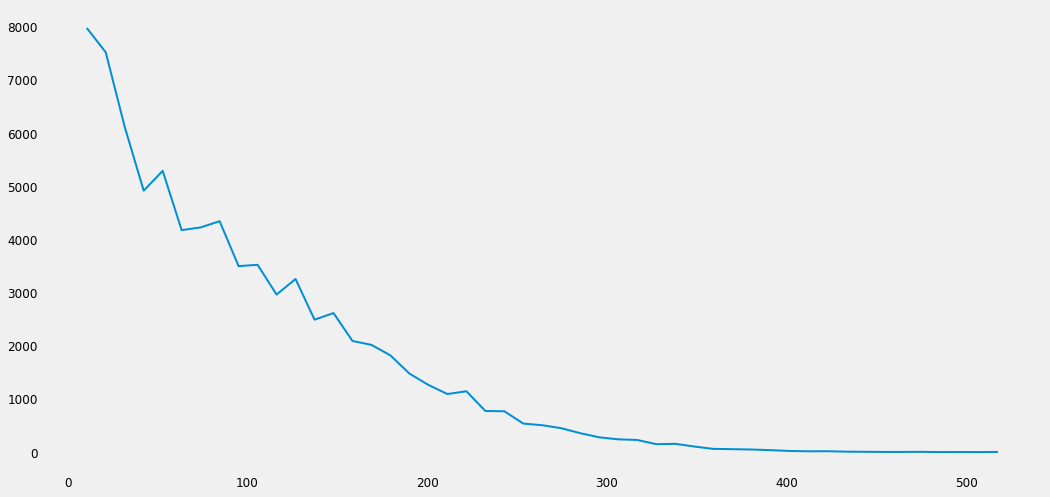

In [181]:
plt.plot(np.exp(x),np.exp(y))


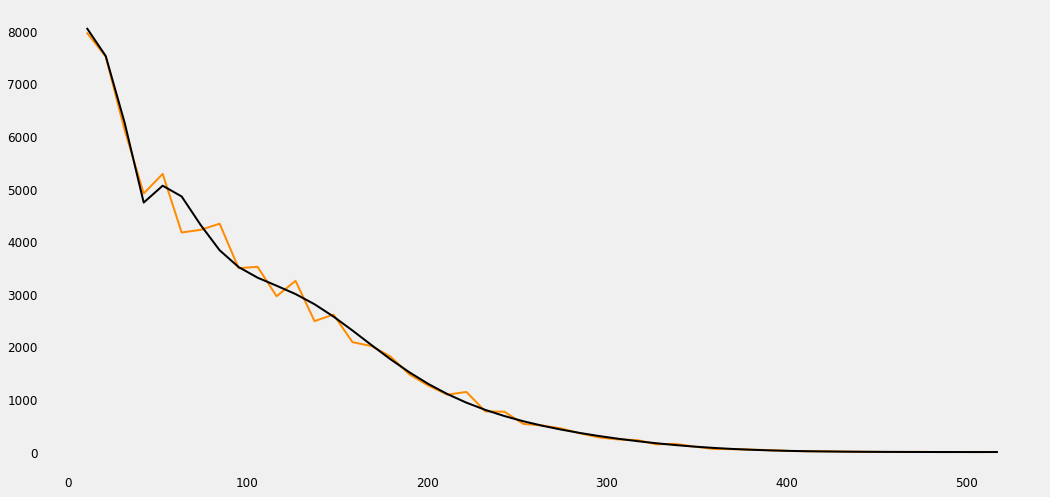

In [182]:
plt.plot(np.exp(x),np.exp(y),color='darkorange')
plt.plot(np.exp(x),np.exp(reg.predict(X)),color='black')
#plt.xlim(0,1.)

# Periodic data:

In [183]:
data=pd.read_csv('year.csv',sep=';',header=None)

Column 1: Gregorian calendar year (mid-year date)
Column 2: Yearly mean total sunspot number.
Column 3: Yearly mean standard deviation of the input sunspot numbers from individual stations.
Column 4: Number of observations used to compute the yearly mean total sunspot number.
Column 5: Definitive/provisional marker. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.

In [184]:
data.tail()

,0,1,2,3,4
315,2015.5,69.8,6.4,8903,1
316,2016.5,39.8,3.9,9940,1
317,2017.5,21.7,2.5,11444,1
318,2018.5,7.0,1.1,12611,1
319,2019.5,3.6,0.5,12884,1


In [185]:
data=data.rename(columns={0:'Year',1:'Sunspot',2:'Sd',3:'N',4:'isprov'})

In [186]:
data=data.drop(data[data['isprov']==0].index)

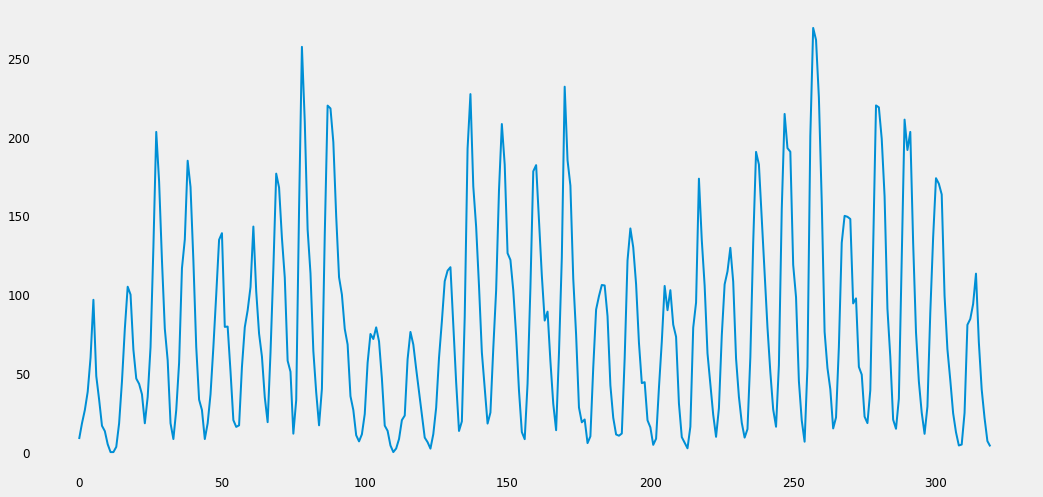

In [187]:
plt.plot(data.Sunspot)

In [188]:
under=np.array(data.Sunspot)
year=np.array(data.Year)
MIN=[]
VALUE=[]
YEAR=[]
for i in range(1,len(under)-1):
    value=under[i]
    if value<under[i-1] and value<=under[i+1]:
        MIN.append(i)
        VALUE.append(value)
        YEAR.append(year[i])

In [189]:
datapoint=pd.DataFrame({'V':VALUE,'M':MIN,'Year':YEAR})

In [190]:
datapoint=datapoint.drop(datapoint[datapoint['V']>40].index)

In [191]:
datapoint=datapoint.drop(datapoint[datapoint['M']==176].index)

In [192]:
year=np.array(datapoint.Year)
V=np.array(datapoint.V)

In [193]:
datapoint['yeardiff']=datapoint.Year.diff()

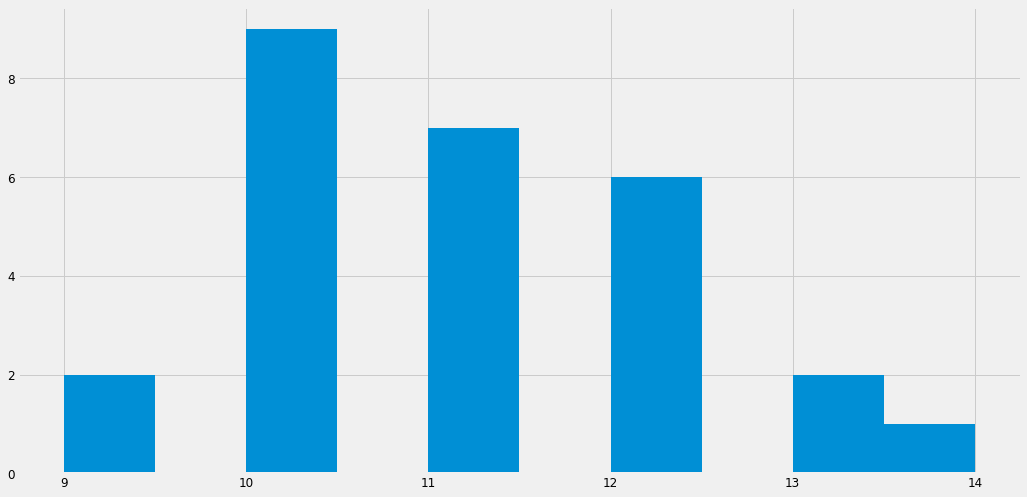

In [194]:
datapoint.yeardiff.hist()

In [195]:
MINV=np.array(datapoint.V)

In [196]:
MAX=[]
MIN=np.array(datapoint.M)

In [197]:
ARGMAX=[]
for m in range(len(MIN)-1):
    MAX.append(under[MIN[m]:MIN[m+1]].max())
    ARGMAX.append(under[MIN[m]:MIN[m+1]].argmax()+MIN[m])

In [198]:
MAX.append(under[MIN[m+1]::].max())
ARGMAX.append(under[MIN[m+1]::].argmax()+MIN[m+1])

In [199]:
MAX=np.array(MAX)
#ARGMAX=np.array(ARGMAX)

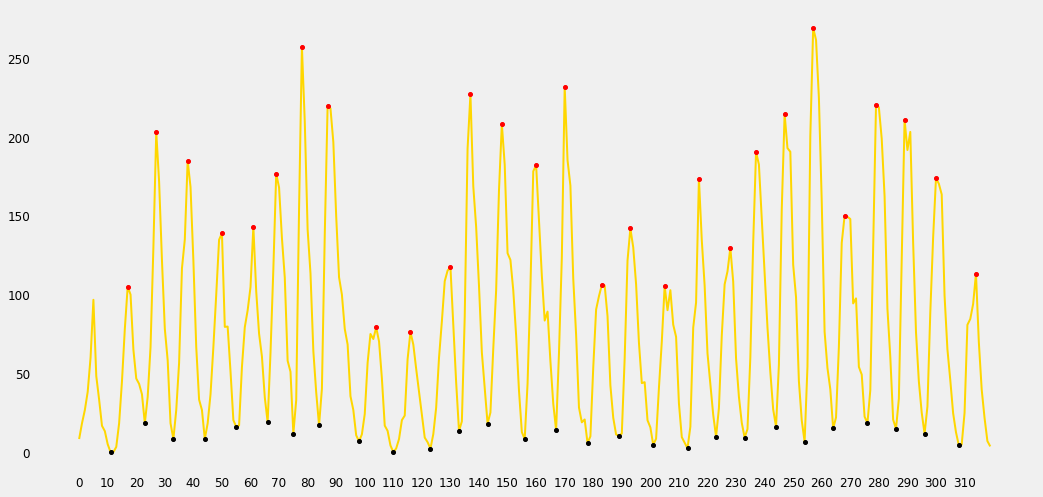

In [200]:
plt.plot(under,color='gold')
plt.xticks(np.arange(0,len(under),10))
plt.plot(ARGMAX,MAX,'.',color='red')
plt.plot(MIN,MINV,'.',color='black')

In [201]:
max_data=pd.DataFrame({'i':ARGMAX,'value':MAX})

# Cycle Exploration

In [276]:
data=pd.read_csv('day.csv',sep=';',header=None)
data=data.rename(columns={0:'Year',1:'Month',2:'Day',3:'Date',4:'Sunspot',5:'Std',6:'N',7:'isprov'})
data=data.drop(data[data['Sunspot']==-1].index)
data=data.drop(data[data.isprov==0].index)

In [277]:
C_YEAR=datapoint.Year.astype(int).tolist()

In [278]:
c_data=data.copy()
comp_year=c_data.Year.drop_duplicates().tolist()

In [279]:
C_YEAR=np.array(C_YEAR)
C_YEAR=C_YEAR[C_YEAR>=comp_year[0]]

In [280]:
start=np.arange(comp_year[0],C_YEAR[0],1)

In [281]:
for y in start:
    c_data=c_data.drop(c_data[c_data['Year']==y].index)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


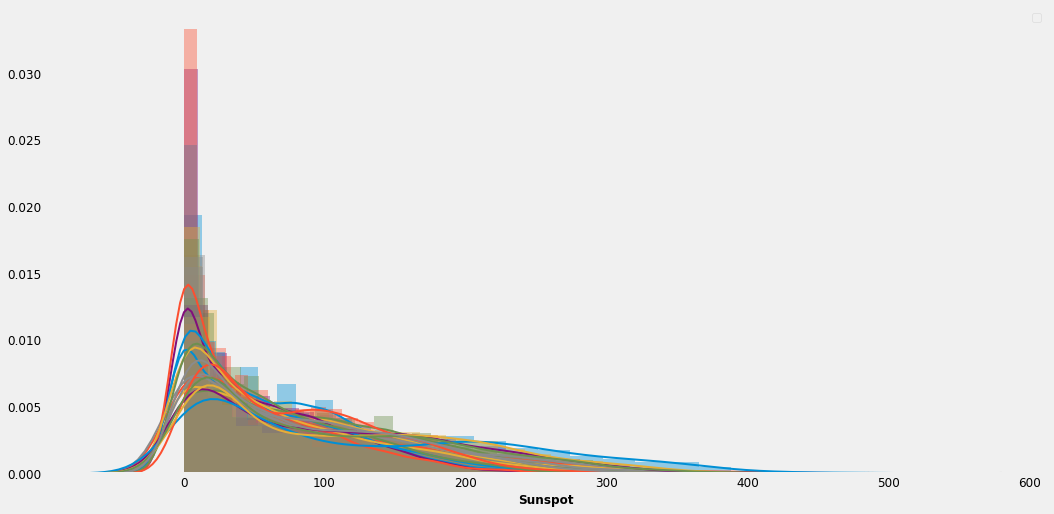

In [282]:
for y in range(len(C_YEAR)-1):
    cicle=c_data[(c_data['Year']>=C_YEAR[y]) & (c_data['Year']<=C_YEAR[y+1])]
    x=np.histogram(cicle.Sunspot,bins=100)[1][0:100]
    y=np.histogram(cicle.Sunspot,bins=100)[0]
    sns.distplot(cicle.Sunspot)
    plt.legend()

In [320]:
N_FEAT=np.arange(0,13,1)
RMSE=[]
N=[]
Y_MAX=[]
PRED_N=[]
Y_N=[]
YEAR=[]
COEF_N=[]
for n in N_FEAT:
    PRED=[]
    COEF=[]
    Y=[]
    for j in range(len(C_YEAR)-2):
        cicle=c_data[(c_data['Year']>=C_YEAR[j]) & (c_data['Year']<=C_YEAR[j+1])]
        x=np.histogram(cicle.Sunspot,bins=100)[1][0:100].astype(float)
        y=np.histogram(cicle.Sunspot,bins=100)[0].astype(float)
        y=y+1
        x=x+1
        #y=np.array(y)
        x=np.log(x)
        #print(y)
        x=x.reshape(-1,1)
        y=np.log(y)
        y=y.reshape(-1,1)
        y=y-y.min()
        poly = PolynomialFeatures(n)
        X=poly.fit_transform(x)
        reg = LinearRegression().fit(X,y )
        pred=reg.predict(X)
        #print(len(pred),len(X))
        PRED.append(np.exp(pred))
        
        coef=[reg.intercept_[0]]
        for c in range(1,len(reg.coef_[0])):
            coef.append(reg.coef_[0][c])
        COEF.append(coef)
        RMSE.append(np.sqrt(mse(np.exp(pred),np.exp(y))))
        Y_MAX.append(np.max(np.exp(y)))
        Y.append(np.exp(y))
        N.append(n)
        YEAR.append(C_YEAR[j])
    PRED_N.append(PRED)
    COEF_N.append(COEF)
    Y_N.append(Y)


In [284]:
res=pd.DataFrame({'RMSE':RMSE,'YEAR':YEAR,'PolynomialFeature':N,'Max':Y_MAX,'Percentage':np.array(RMSE)/np.array(Y_MAX)})


In [285]:
res.loc[res.RMSE==res.RMSE.min()]

,RMSE,YEAR,PolynomialFeature,Max,Percentage
191,7.46948,1986,11,422.0,0.0177


In [286]:
res.sort_values(by='RMSE').head()

,RMSE,YEAR,PolynomialFeature,Max,Percentage
191,7.469480,1986,11,422.0,0.017700
207,7.615658,1986,12,422.0,0.018047
159,7.677652,1986,9,422.0,0.018193
175,7.763181,1986,10,422.0,0.018396
190,8.031353,1976,11,363.0,0.022125


In [287]:
res.sort_values(by='RMSE').tail()

,RMSE,YEAR,PolynomialFeature,Max,Percentage
21,262.731218,1878,1,1097.0,0.239500
27,297.611627,1944,1,575.0,0.517585
24,803.743461,1913,1,868.0,0.925972
20,975.117160,1867,1,1045.0,0.933126
22,1422.770445,1889,1,1077.0,1.321050


In [288]:
MEAN_RMSE=[]
for n in N_FEAT:
    MEAN_RMSE.append(res[res['PolynomialFeature']==n].RMSE.mean())

In [289]:
MEAN_RMSE=np.array(MEAN_RMSE)
min_mod=MEAN_RMSE.argmin()+6
min_rmse=MEAN_RMSE.min()

In [290]:
print (' The best model on training set is ' + str(min_mod)+' with mean RMSE = '+str(min_rmse))

 The best model on training set is 18 with mean RMSE = 14.090206295324247


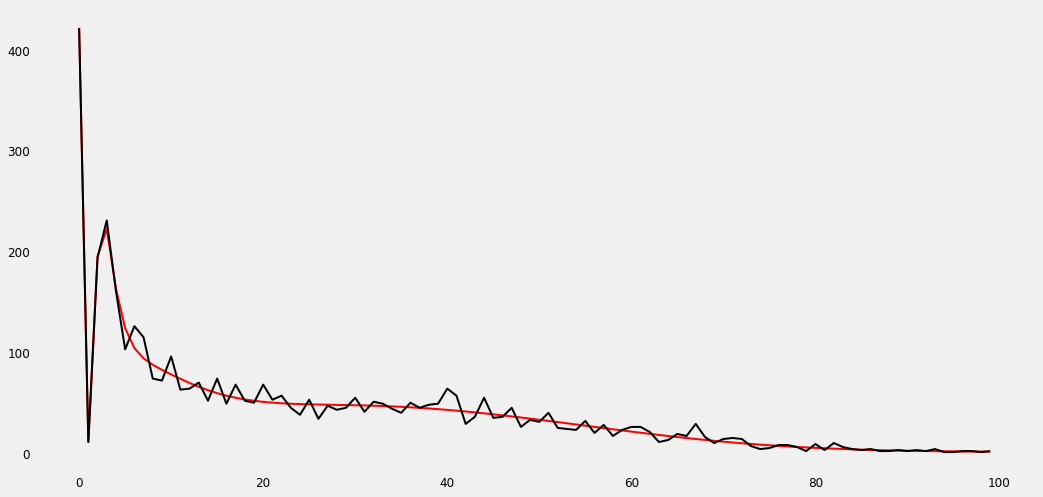

In [292]:
plt.plot(PRED[len(PRED)-1],color='red')
plt.plot(Y[len(PRED)-1],color='black')

In [321]:
MODELS=[]
for c in range(len(COEF_N)):
    model=np.zeros(len(COEF_N[c][0]))
    for y in range(len(COEF_N[c])):
        model=model+COEF_N[c][y]
    MODELS.append(model/16)

In [296]:
def make_prediction(degree):
    x=np.histogram(cicle.Sunspot,bins=50)[1][0:50].astype(float)
    x=np.log(x+1)
    y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
    pred=MODELS[degree][0]
    for i in range(1,degree+1):
        pred=pred+x**i*MODELS[degree][i]
    return pred

In [324]:
PRED=[]
RMSE=[]

cicle=c_data[(c_data['Year']>=C_YEAR[j+1]) & (c_data['Year']<=C_YEAR[j+2])]
x=np.histogram(cicle.Sunspot,bins=50)[1][0:50].astype(float)
y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
y=y+1
x=x+1
#y=np.array(y)
x=np.log(x)
#print(y)
x=x.reshape(-1,1)
y=np.log(y)
Y=[]
#y=y.reshape(-1,1
for n in range(1,len(N_FEAT)):
    y=y-y.min()
    poly = PolynomialFeatures(N_FEAT[n])
    pred=make_prediction(N_FEAT[n])
    RMSE.append(np.sqrt(mse(pred,y)))
   # plt.plot(pred)
   # plt.plot(y,color='black')
    PRED.append(pred)
    Y.append(y.max())
        

    

In [331]:
RMSE=np.array(RMSE)
PERC=RMSE/y.max()

In [332]:
PERC

array([0.16712107, 0.13379385, 0.09613527, 0.1006542 , 0.09129793,
       0.08414474, 0.09365069, 0.08914952, 0.09418435, 0.0912312 ,
       0.09289491, 0.11005076])

In [326]:
best_degree=1+RMSE.argmin()

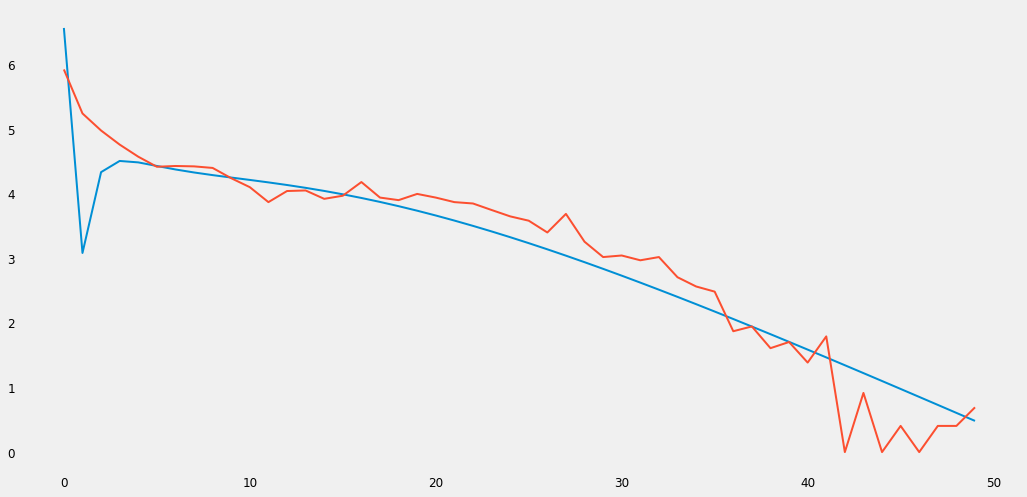

In [327]:
plt.plot(make_prediction(best_degree))
plt.plot(y)

In [328]:
PERC[RMSE.argmin()]

0.08414473902167892

In [333]:
from scipy import stats


In [351]:
c_data

,Year,Month,Day,Date,Sunspot,Std,N,isprov
1826,1823,1,1,1823.001,0,2.0,1,1
1827,1823,1,2,1823.004,0,2.0,1,1
1828,1823,1,3,1823.007,0,2.0,1,1
1829,1823,1,4,1823.010,0,2.0,1,1
1830,1823,1,5,1823.012,0,2.0,1,1
...,...,...,...,...,...,...,...,...
73956,2020,6,26,2020.485,6,0.4,24,1
73957,2020,6,27,2020.488,4,0.8,13,1
73958,2020,6,28,2020.490,0,0.0,36,1
73959,2020,6,29,2020.493,0,0.0,50,1


In [367]:
cicle_2=c_data[(c_data['Year']>=1834) & (c_data['Year']<=1834+11)]
cicle_1=c_data[(c_data['Year']>=1823) & (c_data['Year']<=1834)][0:len(cicle_2)]


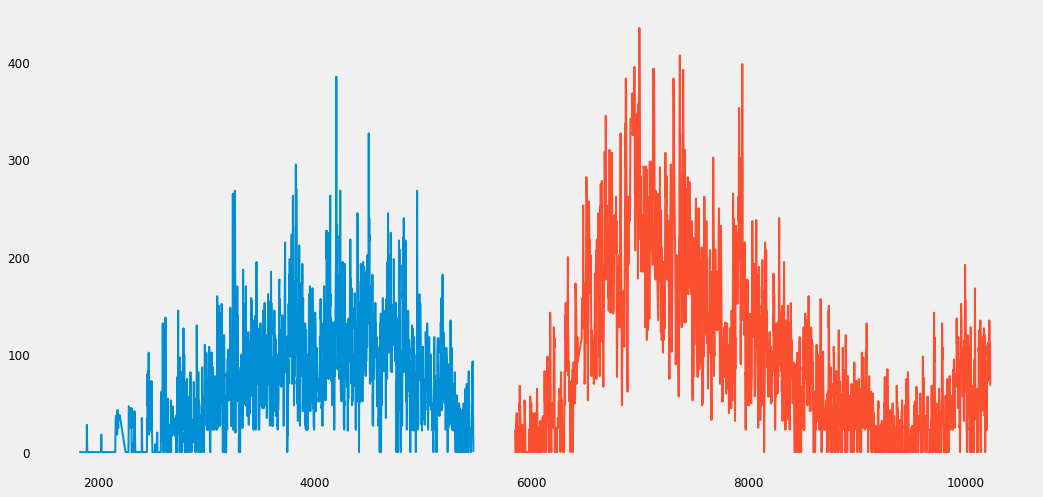

In [368]:
cicle_1.Sunspot.plot()
cicle_2.Sunspot.plot()

In [355]:
len(cicle_2),len(cicle_1)

(2859, 3421)

In [343]:
len(cicle_1.Sunspot),len(cicle_2.Sunspot)

(3161, 2592)

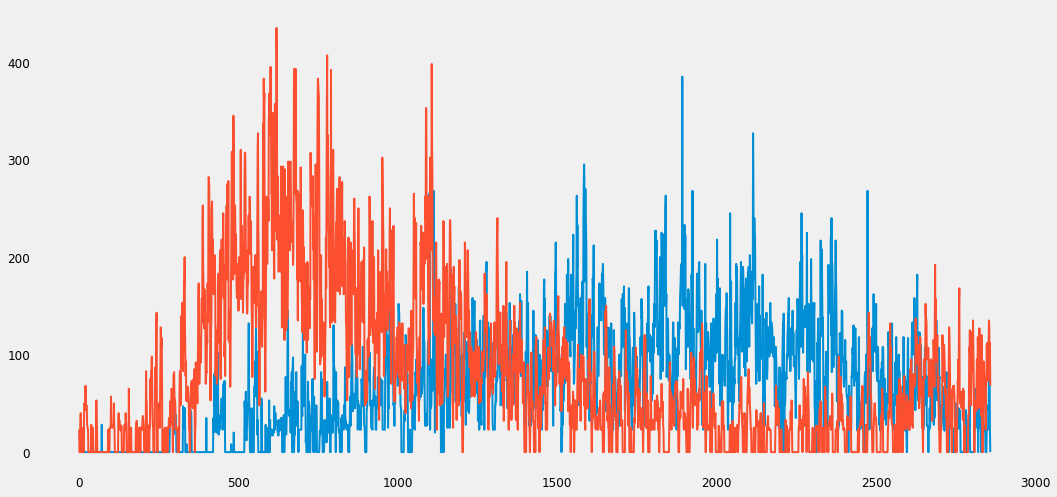

In [370]:
plt.plot(np.array(cicle_1.Sunspot))
plt.plot(np.array(cicle_2.Sunspot))

In [ ]:
c_data[(c_data['Year']>=C_YEAR[i]) & (c_data['Year']<=C_YEAR[i+1])

In [379]:
T=[]
P=[]
for i in range(len(C_YEAR)-1):
    comp_1=c_data[(c_data['Year']>=C_YEAR[i]) & (c_data['Year']<=C_YEAR[i+1])]
    T_I=[]
    P_I=[]
    for j in range(len(C_YEAR)-1):
        comp_2=c_data[(c_data['Year']>=C_YEAR[j]) & (c_data['Year']<=C_YEAR[j+1])][0:len(comp_1)]
        T_I.append(stats.ttest_ind( np.array(comp_1.Sunspot),np.array(comp_2.Sunspot))[0])
        P_I.append(stats.ttest_ind( np.array(comp_1.Sunspot),np.array(comp_2.Sunspot))[1])
    T.append(T_I)
    P.append(P_I)

In [390]:
C_YEAR

array([1823, 1833, 1843, 1856, 1867, 1878, 1889, 1901, 1913, 1923, 1933,
       1944, 1954, 1964, 1976, 1986, 1996, 2008])

In [395]:
len(P_Data),len(C_YEAR)

(17, 18)

In [399]:
T_Data=pd.DataFrame()
for y in range(len(C_YEAR)-1):
    T_Data['%s'%(C_YEAR[y])]=T[y]
T_Data.index=C_YEAR[0:len(T_Data)]

In [404]:
P_Data=pd.DataFrame()
for y in range(len(C_YEAR)-1):
    P_Data['%s'%(C_YEAR[y])]=P[y]
P_Data.index=C_YEAR[0:len(T_Data)]

In [403]:
len(P_Data.index),len(P_Data.loc[1823])

(17, 17)

In [411]:
P_Data[P_Data>0.05].fillna('<0.05')

,1823,1833,1843,1856,1867,1878,1889,1901,1913,1923,1933,1944,1954,1964,1976,1986,1996
1823,1,<0.05,<0.05,<0.05,<0.05,<0.05,0.289601,<0.05,<0.05,0.262729,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05
1833,<0.05,1,0.0912112,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,0.13592,<0.05,<0.05,<0.05,<0.05,<0.05,0.0551814
1843,<0.05,<0.05,1,0.79881,0.628079,<0.05,<0.05,<0.05,<0.05,<0.05,0.119278,<0.05,<0.05,<0.05,<0.05,0.33494,<0.05
1856,<0.05,<0.05,0.265311,1,0.794008,<0.05,<0.05,<0.05,<0.05,<0.05,0.174022,<0.05,<0.05,<0.05,<0.05,0.105643,<0.05
1867,<0.05,<0.05,0.448333,0.794008,1,<0.05,<0.05,<0.05,<0.05,<0.05,0.327529,<0.05,<0.05,<0.05,<0.05,0.177889,<0.05
1878,<0.05,<0.05,<0.05,<0.05,<0.05,1,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05
1889,<0.05,0.869861,<0.05,<0.05,<0.05,<0.05,1,<0.05,0.39526,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05
1901,0.205311,<0.05,<0.05,<0.05,<0.05,0.143607,<0.05,1,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05
1913,<0.05,0.0616596,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,1,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05
1923,<0.05,0.824194,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,1,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05,<0.05


In [418]:
T_Data[P_Data>0.05].fillna('Over')

,1823,1833,1843,1856,1867,1878,1889,1901,1913,1923,1933,1944,1954,1964,1976,1986,1996
1823,0,Over,Over,Over,Over,Over,-1.05907,Over,Over,1.12005,Over,Over,Over,Over,Over,Over,Over
1833,Over,0,1.68927,Over,Over,Over,Over,Over,Over,Over,1.49133,Over,Over,Over,Over,Over,-1.91775
1843,Over,Over,0,-0.254895,-0.48445,Over,Over,Over,Over,Over,-1.55796,Over,Over,Over,Over,0.964268,Over
1856,Over,Over,-1.114,0,-0.261117,Over,Over,Over,Over,Over,-1.3595,Over,Over,Over,Over,1.61827,Over
1867,Over,Over,-0.758231,0.261117,0,Over,Over,Over,Over,Over,-0.979157,Over,Over,Over,Over,1.3474,Over
1878,Over,Over,Over,Over,Over,0,Over,Over,Over,Over,Over,Over,Over,Over,Over,Over,Over
1889,Over,-0.163843,Over,Over,Over,Over,0,Over,-0.850163,Over,Over,Over,Over,Over,Over,Over,Over
1901,-1.2667,Over,Over,Over,Over,1.46262,Over,0,Over,Over,Over,Over,Over,Over,Over,Over,Over
1913,Over,-1.86914,Over,Over,Over,Over,Over,Over,0,Over,Over,Over,Over,Over,Over,Over,Over
1923,Over,0.222165,Over,Over,Over,Over,Over,Over,Over,0,Over,Over,Over,Over,Over,Over,Over


In [429]:
CORR=[]
for y in range(len(C_YEAR)-1):
    corr_perc=1.-sum(P_Data[P_Data>0.05][str(C_YEAR[y])].isna())/17
    CORR.append(corr_perc)

In [430]:
CORR

[0.11764705882352944,
 0.23529411764705888,
 0.3529411764705882,
 0.2941176470588235,
 0.2941176470588235,
 0.11764705882352944,
 0.11764705882352944,
 0.05882352941176472,
 0.11764705882352944,
 0.11764705882352944,
 0.4117647058823529,
 0.05882352941176472,
 0.05882352941176472,
 0.11764705882352944,
 0.05882352941176472,
 0.23529411764705888,
 0.17647058823529416]